# Churning Customers
# Goal:
    * Discover drivers of churn in telco dataset
    * Use drivers to develop a machine learning model to classify customers as likely to churn or not likely to churn

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

import acquire
from scipy import stats
import re

import prepare as p

# Acquire
    * Data acquired from telco.csv file
    * It contained 7043 rows and 24 columns before cleaning
    * Each row represents a customer in the telco database
    * Each column represents a feature of the customer

# Prepare
    *PREPARE ACTIONS:
    * Removed columns that did not contain useful information
    * Rename columns to promote readability
    * Checked for null in the data
    * Checked that colmn data types were appropriate
    * Removed white space from values in object columns
    * Encoded categorical variables
    * Split data into train, validate, and test, stratifying on 'churn'
    * Scaled continous variables
    * Outliers have not been removed from this iteration  of the project

In [2]:
# aquiring data
df = acquire.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
# aquiring, cleaning, and adding features to data
df = p.prep_telco(df)

In [4]:
# splitting data into train, validate, and test
train, validate, test = p.split_telco_data(df)

In [5]:
#A breif look at the data
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [6]:
#A summery of the data
train.describe()

,senior_citizen,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,0.094742,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,0.292896,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

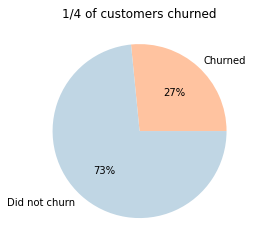

In [7]:
# How often does churning occur?
p.get_pie_churn(train)

In [8]:
# about 1/4 of the customers in the training data will churn

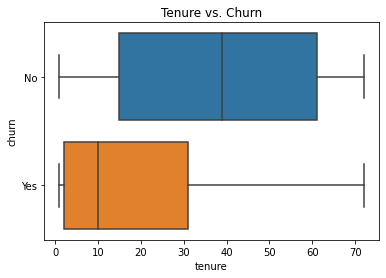

In [9]:
# Does Tenure affect churn?
p.get_tenure(train)

In [10]:
# The higher the tenure of a customer the less likely they are to churn

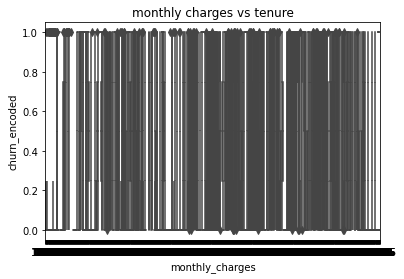

In [11]:
# Does monthly charges affect churn?
p.get_monthly_charges(train)

In [ ]:
# The higher the monthly charges the more likely someone will churn

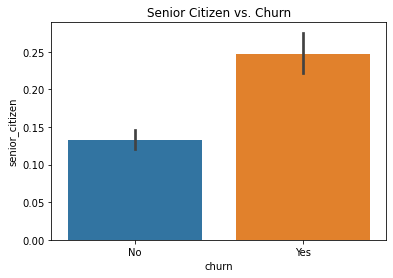

In [8]:
# Does being a senior citizen effect the likelyhood of churn
p.get_senior_citizen(train)

In [ ]:
# Someone that is a senior citizen is more likely to churn

# Exploration Summary
    * "Senior Citizen" was found to be a driver of "churn"
    * "Tenure" was found to be a driver of "churn"
    * "Monthly charges" was found to be a driver of "churn"

# Features I am moving to modeling with
    * "Senior Citizen"
    * "Monthly Charges"
    * "Tenure"

# Features I am not moving to modeling with
    * "gender"

# Modeling
    * I will use 
    * Non-churns makeup 73% of the data
    * by guessing non-churn for every customer one could achieve an accuracy of 73%
    * 73% will be the baseline accuracy I use for this project
    * I will be evaluating models developed using four different model types and various hyperparameter configurations
    * Models will be evaluated on train and validate data
    * The model that performs the best will then be evaluated on test data

In [14]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [13]:
# Prep data for modeling
p.model_prep(train, validate, test)

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [ ]:
# Decisoon Tree
p.get_tree(train_X, validate_X, train_y, validate_y)

In [21]:
clf = DecisionTreeClassifier(max_depth=5,random_state=123)
clf = clf.fit(train_X, train_y)
print(f"Accuracy of Decision Tree on train data is {clf.score(train_X, train_y)}")
print(f"Accuracy of Decision Tree on validate data is {clf.score(validate_X, validate_y)}")

Accuracy of Decision Tree on train data is 0.8054356108712217
Accuracy of Decision Tree on validate data is 0.7766587677725119


In [ ]:
p.get_forest(train_X, validate_X, train_y, validate_y)

In [24]:
# Random Forest
rf = RandomForestClassifier(max_depth=4, random_state=123)
rf.fit(train_X, train_y)
print(f"Accuracy of Random Forest on train is {rf.score(train_X, train_y)}")
print(f"Accuracy of Random Forest on validate is {rf.score(validate_X, validate_y)}")

Accuracy of Random Forest on train is 0.7955295910591821
Accuracy of Random Forest on validate is 0.7808056872037915


In [ ]:
p.get_reg(train_X, validate_X, train_y, validate_y)

In [25]:
# Logistic Regression
logit = LogisticRegression(solver='liblinear')
logit.fit(train_X, train_y)
print(f"Accuracy of Logistic Regression on train is {logit.score(train_X, train_y)}")
print(f"Accuracy of Logistic Regression on validate is {logit.score(validate_X, validate_y)}")

Accuracy of Logistic Regression on train is 0.7896875793751588
Accuracy of Logistic Regression on validate is 0.7796208530805687


In [ ]:
p.get_knn(train_X, validate_X, train_y, validate_y)

In [27]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(train_X, train_y)
print(f"Accuracy of Logistic Regression on train is {knn.score(train_X, train_y)}")
print(f"Accuracy of Logistic Regression on validate is {knn.score(validate_X, validate_y)}")

Accuracy of Logistic Regression on train is 0.8359156718313436
Accuracy of Logistic Regression on validate is 0.7577014218009479


# Comparing Models
    * Decision Tree, Random Forest, KNN, and Logistic Regression all perform above above the baseline of 73%
    * KNN had the largest disparity in percentage with 8% so it will be disqualified. It is likely overfit.
    * Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I could proceed to test with any of these models.
    * I have chosen to move forward with the Random Forest model

# Random Forest on Test

In [ ]:
# get test results for final model
p.get_forest(train_X, test_X, train_y, test_y)

# Modeling Summary
    * Decision Tree, Random Forest, Logistic Regression, and KNN  models all performed above the baseline on train and validate
    * The KNN model performed slighlty better on train data but was worse on validate data. It is likely overfit.
    * A Random Forest model selected as the final model and had an accuracy of about

# Conclusions